<a href="https://colab.research.google.com/github/YuriQuisbert/Turbina_Eolica/blob/main/Turbina_Eolica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*desenvolvido por:*


<img alt="Colaboratory logo" width="25%" src="https://github.com/YuriQuisbert/pessoal/blob/main/Yuri%20Quisbert..png?raw=true">

---
🚀 [*yuriquisbert.com.br*](yuriquisbert.com.br)

---


#1. Importando os dados e bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
turbine = pd.read_csv('https://raw.githubusercontent.com/YuriQuisbert/Turbina_Eolica/main/Turbina_Eolica.csv?token=GHSAT0AAAAAABVDI4KUZA34NPPFSEXMNUOMYUWNYSA')
turbine.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [3]:
turbine['Date/Time'] = pd.to_datetime(turbine['Date/Time'])

In [4]:
colunas = ['Data/Hora', 'Potencia_Ativa', 'Velocidade_Vento', 'Curva_Teorica', 'Direcao_Vento']
turbine.columns = colunas

In [5]:
turbine.insert(0, 'Data', pd.to_datetime(turbine['Data/Hora']).dt.date)
turbine.insert(1, 'Hora', pd.to_datetime(turbine['Data/Hora']).dt.time)
turbine['Data'] = pd.to_datetime(turbine['Data'])
turbine = turbine.drop(columns='Data/Hora')

In [6]:
turbine.dtypes

Data                datetime64[ns]
Hora                        object
Potencia_Ativa             float64
Velocidade_Vento           float64
Curva_Teorica              float64
Direcao_Vento              float64
dtype: object

#2.Plotando Gráficos

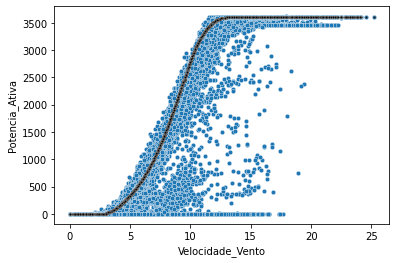

In [7]:
fig, ax = plt.subplots()

sns.scatterplot(data=turbine, x='Velocidade_Vento', y='Potencia_Ativa', ax=ax, s=20)
sns.scatterplot(data=turbine, x='Velocidade_Vento', y='Curva_Teorica', ax=ax, s=5, color='black')

plt.show()

In [40]:
a = turbine['Velocidade_Vento'][turbine['Curva_Teorica'] > 0].min()
b = turbine['Velocidade_Vento'][turbine['Curva_Teorica'] == 3600].min()
c = turbine['Velocidade_Vento'][turbine['Curva_Teorica'] > 1800].min()

print(f'A velocidade de vento mínima para gerar energia é de {a:.2f} m/s')
print(f'A velocidade de vento mínima para gerar o máximo de energia é de {b:.2f} m/s')
print(f'A velocidade de vento para gerar o metade de energia é de {c:.2f} m/s')

A velocidade de vento mínima para gerar energia é de 3.00 m/s
A velocidade de vento mínima para gerar o máximo de energia é de 13.00 m/s
A velocidade de vento para gerar o metade de energia é de 8.45 m/s


In [54]:
pot_real = turbine['Potencia_Ativa'].tolist()
pot_teorica = turbine['Curva_Teorica'].tolist()

pot_max = []
pot_min = []
limite = []

for p in pot_teorica:
  pot_min.append(p*0.90)

for i, j in enumerate(pot_real):
  if j >= pot_min[i]:
    limite.append('Dentro')
  else:
    limite.append('Fora')

turbine['Limite'] = limite

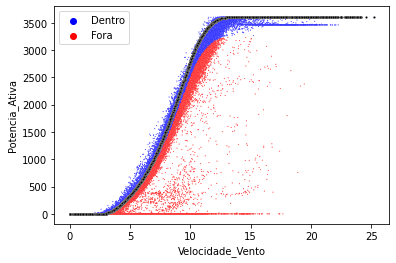

In [56]:
cores = {'Dentro':'blue','Fora':'red'}
fig, ax = plt.subplots()

sns.scatterplot(data=turbine, x = 'Velocidade_Vento', y = 'Potencia_Ativa', hue = 'Limite', s=1, palette=cores)
sns.scatterplot(data=turbine, x='Velocidade_Vento', y='Curva_Teorica', ax=ax, s=5, color='black')

plt.show()

In [58]:
turbine['Limite'].value_counts()/turbine.shape[0]*100

Dentro    54.326143
Fora      45.673857
Name: Limite, dtype: float64

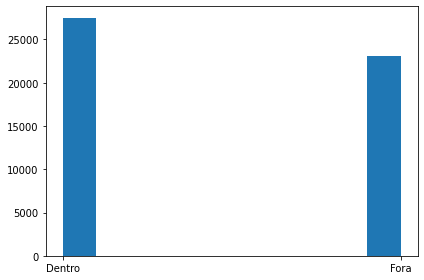

In [57]:
fig, ax = plt.subplots()

ax.hist('Limite', data=turbine)

plt.tight_layout()

In [9]:
turbinehourmean = turbine.groupby(['Hora']).mean()

<function matplotlib.pyplot.show>

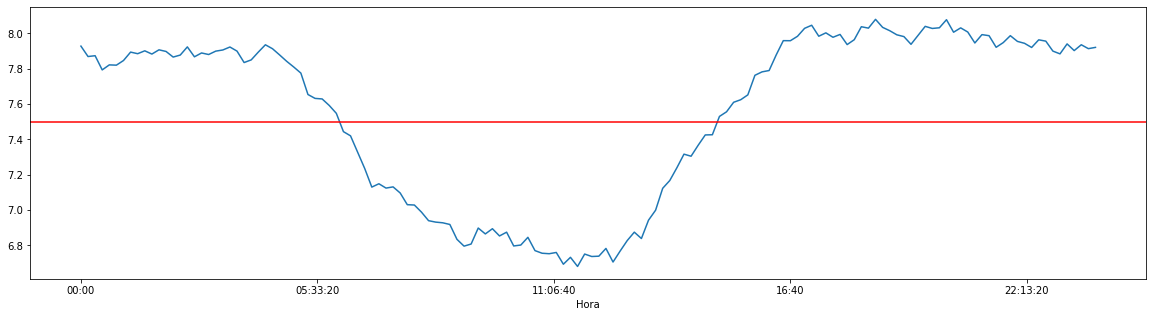

In [10]:
fig, ax = plt.subplots(figsize = (20,5))

turbinehourmean['Velocidade_Vento'].plot(kind='line', ax = ax)
plt.axhline(y=7.5, color = 'red')

plt.show

In [11]:
z = turbinehourmean.loc[turbinehourmean['Velocidade_Vento'] <= 7.5]
print(f'Os horários com média de ventos acima de 7.5 m/s são antes das {z.iloc[0:1,].index[0]} ou depois das {z.iloc[-1:,].index[0]}')

Os horários com média de ventos acima de 7.5 m/s são antes das 06:10:00 ou depois das 14:50:00


In [12]:
w = turbinehourmean.loc[turbinehourmean['Velocidade_Vento'] == turbinehourmean.Velocidade_Vento.max()]
print(f'Sendo que o melhor horário possível é as {w.iloc[0:1,].index[0]}')

Sendo que o melhor horário possível é as 18:40:00


In [13]:
turbinebest = turbine.groupby(['Data']).max()

In [15]:
x = 0
list1 = []
for i, j in enumerate(turbinebest['Velocidade_Vento']):
  if i < 6:
    x = 0
  else:
    for v in range(0,7):
      x = x + turbinebest['Velocidade_Vento'][i - v]
    x = x/7
  list1.append(x)
  x = 0

In [16]:
turbinebest['Media_Movel'] = list1

<function matplotlib.pyplot.show>

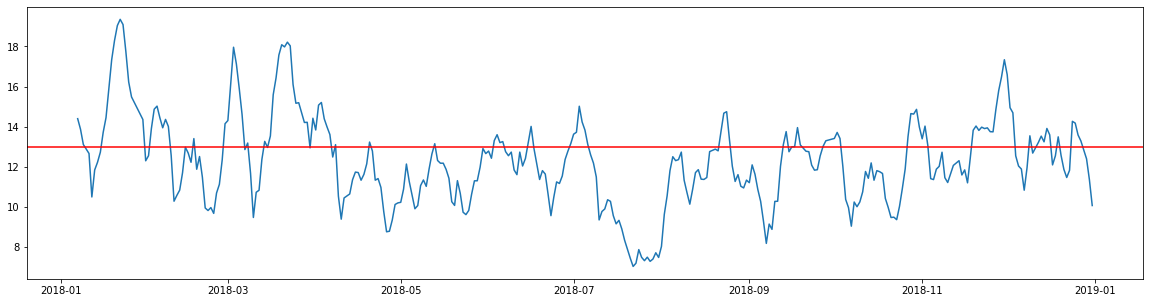

In [18]:
fig, ax = plt.subplots(figsize = (20,5))

ax.plot(turbinebest.index[6:], turbinebest['Media_Movel'][6:])
plt.axhline(y=13, color = 'red')

plt.show

In [41]:
nivelvel=[]

velocidade = turbine['Velocidade_Vento'].tolist()

for i,j in enumerate(velocidade):
  if j < 3:
    nivelvel.append('Muito Baixo')
  elif j < 8.45:
    nivelvel.append('Baixo')
  elif j < 13:
    nivelvel.append('Medio')
  else:
    nivelvel.append('Alto')

turbine['NivelVel'] = nivelvel

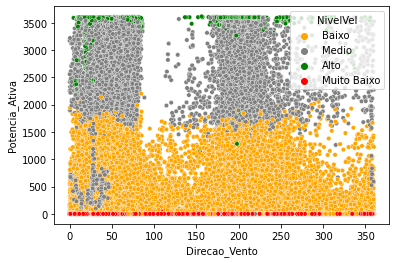

In [42]:
color = {'Muito Baixo':'red','Baixo':'orange','Medio':'gray','Alto':'green'}

graf = sns.scatterplot(data=turbine, x='Direcao_Vento', y='Potencia_Ativa', hue='NivelVel', palette = color, s=20)

In [43]:
turbine['NivelVel'].value_counts()/turbine.shape[0]*100

Baixo          46.746487
Medio          27.124481
Muito Baixo    15.335444
Alto           10.793588
Name: NivelVel, dtype: float64

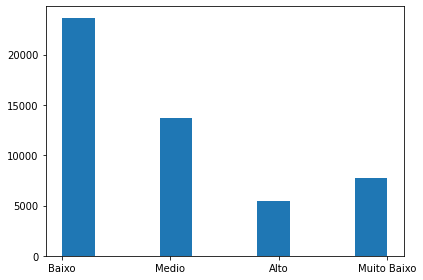

In [50]:
fig, ax = plt.subplots()

ax.hist('NivelVel', data=turbine)

plt.tight_layout()
